______________________________________________________________________________________________________________________
# Khung Huan Chan Cambridge Data Science Programme Final Project
______________________________________________________________________________________________________________________

Dataset: worldometer_data.csv  
Obtained from: https://www.kaggle.com/datasets/imdevskp/corona-virus-report

______________________________________________________________________________________________________________________
## Introduction
______________________________________________________________________________________________________________________
This dataset contains the reported Covid-19 statistics across more than 200 countries, including the total number of reported cases and deaths. This data originated from the https://www.worldometers.info/ which is an online database that tracks real-time reported Covid-19 summary statistics. This data was dated on the 22/01/2020.

This dataset contains a lot of information which can help deduce how much Covid-19 impacted each individual country or continent. Furthermore, we can identify how severe the Covid-19 virus is in terms of how it affects the mortality rate for different countries.

______________________________________________________________________________________________________________________

## Methods
______________________________________________________________________________________________________________________
1. Installing all required libraries and importing dataset into pandas
2. Cleaning up the dataset and splitting it into specific subsets for further analysis
3. Identifying the top 10 counties with the highest and lowest reported Covid-19 cases
4. Grouping the countries into their respective continents and deducing which continents have the highest and lowest reported Covid-19 cases
5. Investigating the relationship between the number of reported Covid-19 tests and cases
6. Looking at the relationship between the top 10 countries with the highest reported Covid-19 tests and cases
7. Identifying the relationship between the total reported Covid-19 cases and deaths
8. Looking at the top 10 countries with the highest and lowest reported Covid-19 patient recovery rates

______________________________________________________________________________________________________________________
## Installing Relevant Libraries and Importing Dataset
______________________________________________________________________________________________________________________


In [521]:
# Installing required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [522]:
# Importing dataset which is in a csv format into pandas

df = pd.read_csv("worldometer_data.csv")

______________________________________________________________________________________________________________________

## Data exploration and preparation
______________________________________________________________________________________________________________________

In [523]:
# Confirming the type of data structure

type(df)

pandas.core.frame.DataFrame

In [524]:
# Identifying overall shape of dataframe

df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [525]:
# Looking to see how many rows and columns this dataset contains

df.shape

(209, 16)

- This dataset contains 209 rows and 16 columns

In [526]:
# Iterating over each column headers to see what unique variables we are working with

for col in df.columns:
    print(col)

Country/Region
Continent
Population
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/1M pop
WHO Region


______________________________________________________________________________________________________________________
## Splitting Main Dataframe into Different Subsets for Further Exploration
______________________________________________________________________________________________________________________


In [527]:
# Creating a new dataframe (dfx) with variables required for this investigation

dfx = ["Country/Region", "Continent", "Population", "TotalCases", "TotalDeaths", "TotalRecovered", "TotalTests"]
dfx = df[dfx]
dfx.head(5)

,Country/Region,Continent,Population,TotalCases,TotalDeaths,TotalRecovered,TotalTests
0,USA,North America,3.311981e+08,5032179,162804.0,2576668.0,63139605.0
1,Brazil,South America,2.127107e+08,2917562,98644.0,2047660.0,13206188.0
2,India,Asia,1.381345e+09,2025409,41638.0,1377384.0,22149351.0
3,Russia,Europe,1.459409e+08,871894,14606.0,676357.0,29716907.0
4,South Africa,Africa,5.938157e+07,538184,9604.0,387316.0,3149807.0


In [528]:
# Summary of (dfx) dataframe

dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  209 non-null    object 
 1   Continent       208 non-null    object 
 2   Population      208 non-null    float64
 3   TotalCases      209 non-null    int64  
 4   TotalDeaths     188 non-null    float64
 5   TotalRecovered  205 non-null    float64
 6   TotalTests      191 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 11.6+ KB


- This dataset contains 209 rows and 7 columns

In [529]:
# Checking summary statistics of (dfx) dataframe up to two decmial places

dfx.describe().round(2)

,Population,TotalCases,TotalDeaths,TotalRecovered,TotalTests
count,2.080000e+02,209.00,188.00,205.00,191.00
mean,3.041549e+07,91718.50,3792.59,58878.98,1402404.70
std,1.047661e+08,432586.68,15487.18,256698.41,5553366.67
min,8.010000e+02,10.00,1.00,7.00,61.00
25%,9.663140e+05,712.00,22.00,334.00,25752.00
50%,7.041972e+06,4491.00,113.00,2178.00,135702.00
75%,2.575614e+07,36896.00,786.00,20553.00,757696.00
max,1.381345e+09,5032179.00,162804.00,2576668.00,63139605.00


In [530]:
# Checking if any rows have missing data 

dfx.isnull().sum()

Country/Region     0
Continent          1
Population         1
TotalCases         0
TotalDeaths       21
TotalRecovered     4
TotalTests        18
dtype: int64

- The Continent variable has 1 row with missing data
- The Population variable has 1 row with missing data
- The TotalDeaths variable has 21 rows with missing data
- The TotalRecovered variable has 4 rows with missing data
- The TotalTests variable has 18 rows with missing data

In [531]:
# Creating a new dataframe (dfxx) which drops rows with missing data from the (dfx) dataframe

dfxx = dfx.dropna()

In [532]:
# Checking if all the rows with missing data are removed

dfxx.isnull().sum()

Country/Region    0
Continent         0
Population        0
TotalCases        0
TotalDeaths       0
TotalRecovered    0
TotalTests        0
dtype: int64

In [533]:
# Summary of (dfxx) dataframe

dfxx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 204
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  169 non-null    object 
 1   Continent       169 non-null    object 
 2   Population      169 non-null    float64
 3   TotalCases      169 non-null    int64  
 4   TotalDeaths     169 non-null    float64
 5   TotalRecovered  169 non-null    float64
 6   TotalTests      169 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 10.6+ KB


- 40 rows of missing data were dropped leaving 169 rows fo data to analyze

In [534]:
# Checking for duplicates

dfxx.duplicated().value_counts()

False    169
dtype: int64

- No duplicates found

______________________________________________________________________________________________________________________

## Exploring Countries with the Highest and Lowest Total Reported Covid-19 cases
______________________________________________________________________________________________________________________


In [535]:
# Creating a new dataframe (df1) from countries and total cases data obtained from the (dfxx) dataframe

df1 = dfxx[["Country/Region", "TotalCases"]]
df1.head(5)

,Country/Region,TotalCases
0,USA,5032179
1,Brazil,2917562
2,India,2025409
3,Russia,871894
4,South Africa,538184


In [536]:
# Checking summary statistics up to two decmial places

df1.describe().round(2)

,TotalCases
count,169.00
mean,108263.77
std,478518.80
min,13.00
25%,1232.00
50%,7073.00
75%,45098.00
max,5032179.00


In [537]:
# Creating a dataframe (df1h) which has the total reported cases of the different countries arranged in descending order

df1h = df1.sort_values(by="TotalCases", ascending=False)
df1h.head(10)

,Country/Region,TotalCases
0,USA,5032179
1,Brazil,2917562
2,India,2025409
3,Russia,871894
4,South Africa,538184
5,Mexico,462690
6,Peru,455409
7,Chile,366671
8,Colombia,357710
10,Iran,320117


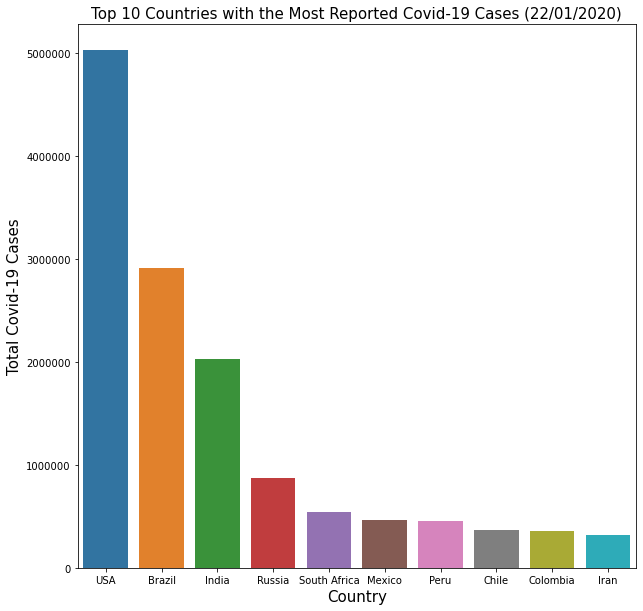

In [538]:
# Graph of top 10 countries with the most Covid-19 cases on the 22/01/2020

plt.figure(figsize = (10,10))
plt.ticklabel_format(style='plain')
a = sns.barplot(x="Country/Region", y="TotalCases", data= df1h.iloc[0:10])
a.set_xlabel("Country", fontsize = 15)
a.set_ylabel("Total Covid-19 Cases", fontsize = 15)
a.set_title("Top 10 Countries with the Most Reported Covid-19 Cases (22/01/2020)", fontsize = 15)
plt.show()
plt.close()

- USA had the most reported Covid-19 cases 
- The difference between the country with the highest (USA) and lowest (Iran) Covid-19 case amongst the overall top countries with the highest reported Covid-19 cases is 4712062 cases which is within a very high range

In [539]:
# Creating a dataframe (df1l) which has the total reported cases of the different countries arranged in ascending order

df1l = df1.sort_values(by="TotalCases", ascending=True)
df1l.head(10)

,Country/Region,TotalCases
204,Montserrat,13
195,Fiji,27
194,Curaçao,31
192,Saint Martin,53
189,Belize,86
188,Liechtenstein,89
187,Antigua and Barbuda,92
185,Monaco,125
183,Turks and Caicos,129
182,Barbados,133


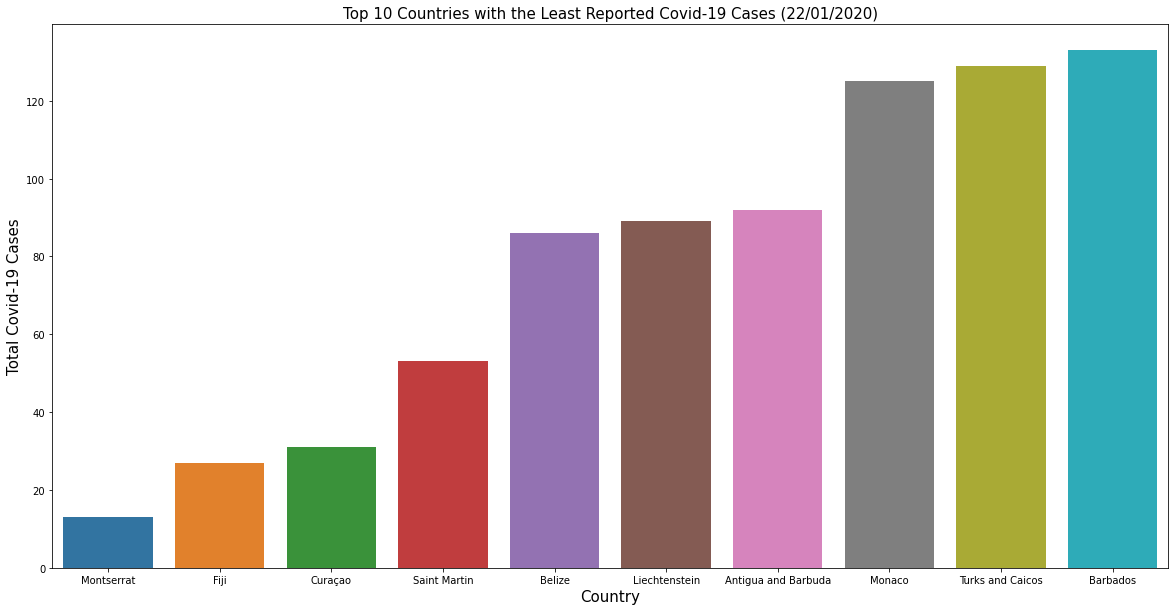

In [540]:
# Graph of top 10 countries with the least reported Covid-19 cases on the 22/01/2020

plt.figure(figsize = (20,10))
b = sns.barplot(x="Country/Region", y="TotalCases", data= df1l.iloc[0:10])
b.set_xlabel("Country", fontsize = 15)
b.set_ylabel("Total Covid-19 Cases", fontsize = 15)
b.set_title("Top 10 Countries with the Least Reported Covid-19 Cases (22/01/2020)", fontsize = 15)
plt.show()
plt.close()

- Montserrat had the least reported Covid-19 cases 
- The difference between the country with the highest (Barbados) and lowest (Montserrat) Covid-19 case amongst the overall top countries with the lowest reported Covid-19 cases is 120 cases which is within a low range
- The difference between the country with the highest and lowest reported Covid-19 cases is too big and can be due to a variety of factors such as the efficiency of the Covid-19 testing of each country

In [541]:
# Dropping data with TotalCases value of less than 1232 which is the lower quartile of the dataset and checking the shape of the new dataframe (df1SD)

df1SD = df1l.drop(df1l[df1l.TotalCases < 1232].index) 
df1SD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 137 to 0
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  127 non-null    object
 1   TotalCases      127 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


- 42 rows of data have total cases of less than 1232 cases and have been dropped
- Only the cases below the lower quartile of the dataset have been dropped instead of including the cases above the higher quartile as well, because it would be more probable for inaccurate Covid-19 testing in countries with low reported cases, but this is beyond the scope of this investigation to draw an accurate conclusion

In [542]:
# Shape of (df1SD) dataframe

df1SD.head(10)

,Country/Region,TotalCases
137,Jordan,1232
136,Latvia,1275
135,Uruguay,1318
134,Angola,1483
133,New Zealand,1569
132,Tunisia,1642
131,Yemen,1768
129,Iceland,1930
128,Benin,1936
127,Guinea-Bissau,2032


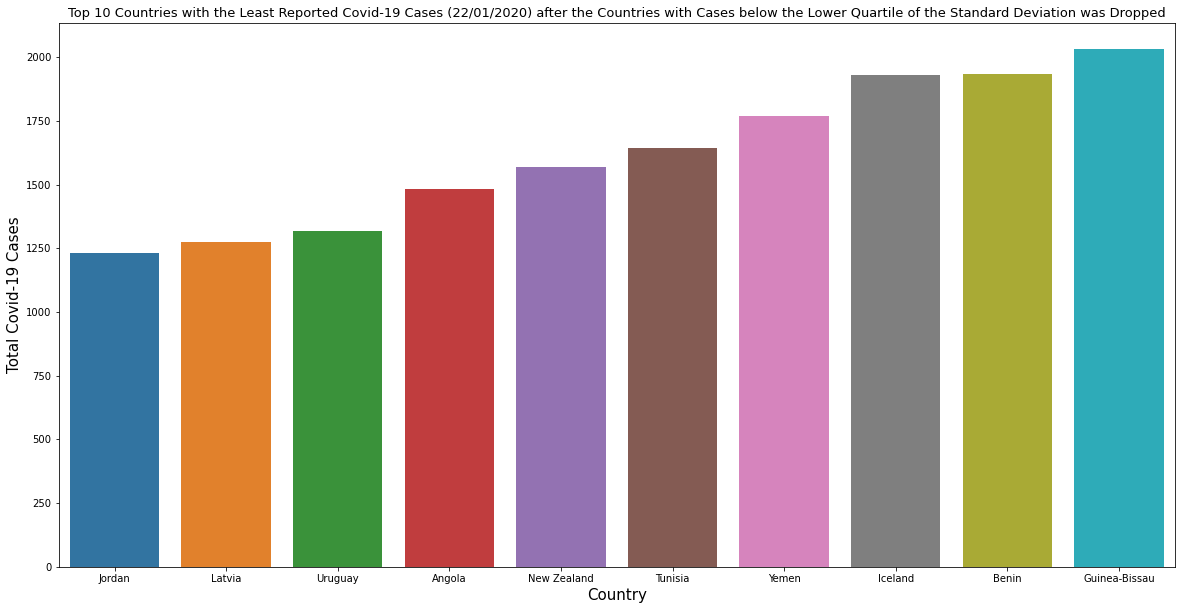

In [543]:
# Graph of top 10 countries with the least reported Covid-19 cases on the 22/01/2020 after the countries with cases below the lower quartile of the standard deviation was dropped

plt.figure(figsize = (20,10))
c = sns.barplot(x="Country/Region", y="TotalCases", data= df1SD.iloc[0:10])
c.set_xlabel("Country", fontsize = 15)
c.set_ylabel("Total Covid-19 Cases", fontsize = 15)
c.set_title("Top 10 Countries with the Least Reported Covid-19 Cases (22/01/2020) after the Countries with Cases below the Lower Quartile of the Standard Deviation was Dropped", fontsize = 13)
plt.show()
plt.close()

- Jordan had the least reported Covid-19 cases after countries with cases below the lower quartile of the standard deviation was dropped
- The difference between the country with the highest (Guinea-Bissau) and lowest (Jordan) Covid-19 case amongst the overall top countries with the lowest reported Covid-19 cases is 800 cases which is within a moderate range

______________________________________________________________________________________________________________________

## Exploring the Continents with the Highest and Lowest Total Reported Covid-19 Cases
______________________________________________________________________________________________________________________


In [544]:
# Creating a new dataframe (df2) from countries, continents and total cases data obtained from the (dfxx) dataframe

df2 = dfxx[["Country/Region", "Continent", "TotalCases"]]
df2.head()

,Country/Region,Continent,TotalCases
0,USA,North America,5032179
1,Brazil,South America,2917562
2,India,Asia,2025409
3,Russia,Europe,871894
4,South Africa,Africa,538184


In [545]:
# Creating a new dataframe (df2h) which groups the different countries into their respective continents and displays their total reported Covid-19 cases

df2h = df2.groupby(['Continent']).sum()
df2h.head(10)

,TotalCases
Continent,
Africa,955635
Asia,4680398
Australia/Oceania,21649
Europe,2180495
North America,5915140
South America,4543260


In [546]:
# Sorting continents according to the ascending total reported Covid-19 case order and putting it in a new dataframe (df2H)

df2H = df2h.sort_values(by=['TotalCases'], ascending=True)
df2H.head(10)

,TotalCases
Continent,
Australia/Oceania,21649
Africa,955635
Europe,2180495
South America,4543260
Asia,4680398
North America,5915140


- There are only 6 continents in the dataset

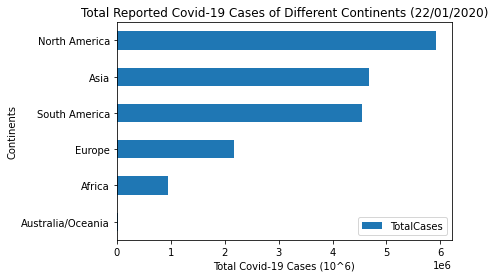

In [547]:
# Graph of different continents with their respective overall reported Covid-19 cases on the 22/01/2020

d = df2H.plot.barh()
plt.rcParams["figure.figsize"] = (15,10)
plt.legend(loc='lower right')
d.set_xlabel("Total Covid-19 Cases (10^6)", fontsize = 10)
d.set_ylabel("Continents", fontsize = 10)
d.set_title("Total Reported Covid-19 Cases of Different Continents (22/01/2020)")
plt.show()
plt.close()

- North America has the most reported Covid-19 cases whereas Australia/Oceania has the least and they have a difference of 5892491 cases
- Cases that were lower than the lower quartile of the standard deviation of the total number of reported Covid-19 cases were not dropped as this would most likely affect the continents with the lower number of cases and we might lose some power of the study

______________________________________________________________________________________________________________________

## Relationship between the Total Covid-19 Tests and Reported Cases
______________________________________________________________________________________________________________________


In [548]:
# Creating a new dataframe (df3) from countries, total tests and cases data obtained from the (dfxx) dataframe

df3 = dfxx[["Country/Region", "TotalTests", "TotalCases"]]
df3.head()

,Country/Region,TotalTests,TotalCases
0,USA,63139605.0,5032179
1,Brazil,13206188.0,2917562
2,India,22149351.0,2025409
3,Russia,29716907.0,871894
4,South Africa,3149807.0,538184


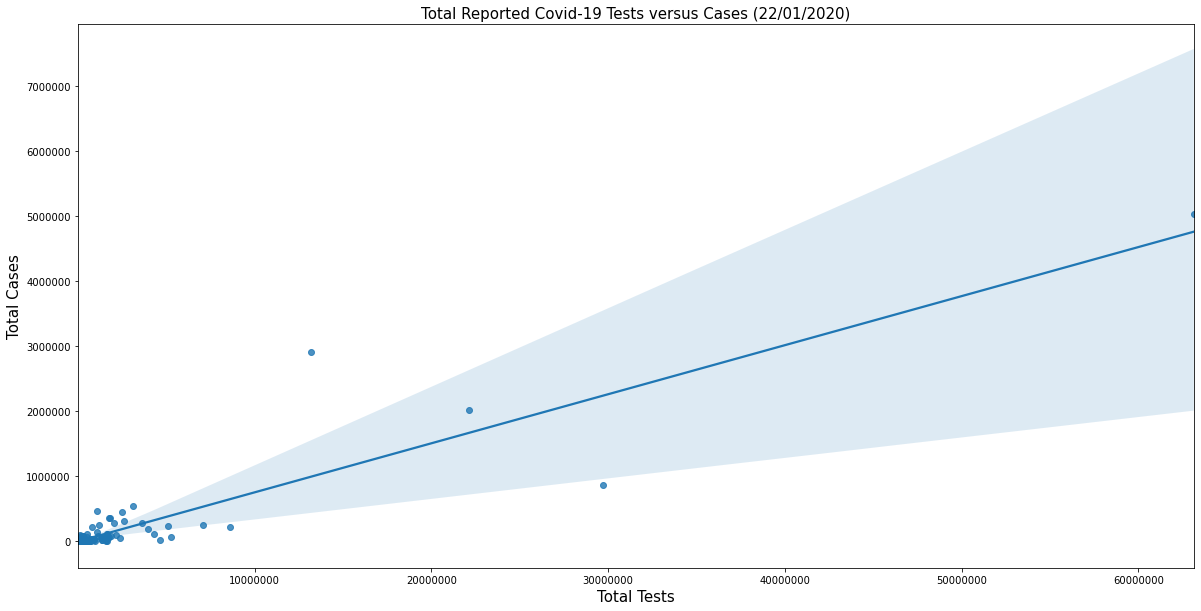

In [549]:
# Regression graph of relationship between the total reported Covid-19 tests and cases on the 22/01/2020

plt.figure(figsize = (20,10))
plt.ticklabel_format(style='plain')
e = sns.regplot(data=df3, x="TotalTests", y="TotalCases")
e.set_xlabel("Total Tests", fontsize = 15)
e.set_ylabel("Total Cases", fontsize = 15)
e.set_title("Total Reported Covid-19 Tests versus Cases (22/01/2020)", fontsize = 15)
plt.show()
plt.close()

- A positive correlation can be seen whereby as the total number of Covid-19 tests increases, there are more reported cases

In [550]:
# Calculation of the regression line between the variables of the total reported Covid-19 tests and cases on the 22/01/2020

j = df3['TotalTests']
k = df3['TotalCases']

def linear_regression(j, k):     
    N = len(j)
    j_mean = j.mean()
    k_mean = k.mean()
    
    B1_num = ((j - j_mean) * (k - k_mean)).sum()
    B1_den = ((j - j_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = k_mean - (B1*j_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

def corr_coef(j, k):
    N = len(j)
    
    num = (N * (j*k).sum()) - (j.sum() * k.sum())
    den = np.sqrt((N * (j**2).sum() - j.sum()**2) * (N * (k**2).sum() - k.sum()**2))
    R = num / den
    return R

B0, B1, reg_line = linear_regression(j, k)
print('Regression Line: ', reg_line)
R = corr_coef(j, k)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 685.5375430915592 + 0.075β
Correlation Coef.:  0.9046005033512491
"Goodness of Fit":  0.8183020706633332


- The correlation coefficient of this regression line is positive (0.90) therefore you can say that there is a positive correlation between the total Covid-19 tests and reported cases
- The goodness of fit (0.82) of this regression line is moderately close to 1 which explains that the variable total tests is able to explain roughly 82% of the variance of the variable total reported cases

______________________________________________________________________________________________________________________

## Relationship between Countries with the Highest Covid-19 tests and Reported Cases
______________________________________________________________________________________________________________________


In [551]:
# Creating a dataframe (df3H) which has the total tests of the different countries arranged in descending order

df3H = df3.sort_values(by="TotalTests", ascending=False)
df3H.head(10)

,Country/Region,TotalTests,TotalCases
0,USA,63139605.0,5032179
3,Russia,29716907.0,871894
2,India,22149351.0,2025409
1,Brazil,13206188.0,2917562
18,Germany,8586648.0,215210
15,Italy,7099713.0,249204
38,UAE,5262658.0,61845
16,Turkey,5081802.0,237265
67,Australia,4631419.0,19890
23,Canada,4319172.0,118561


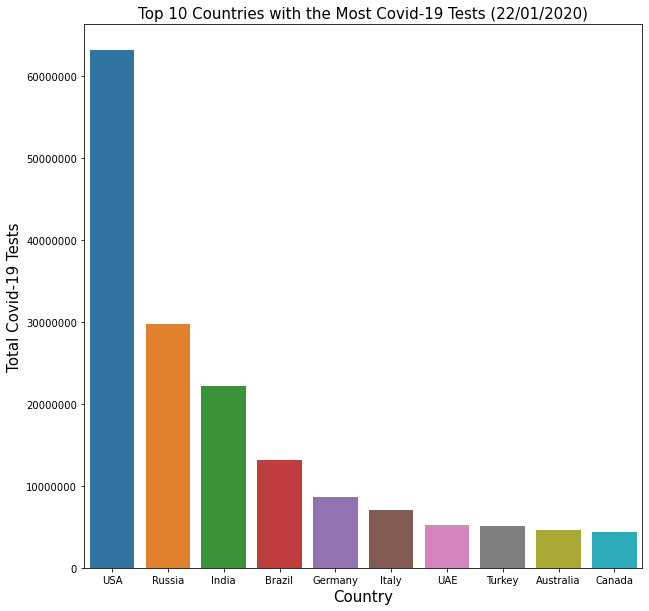

In [552]:
# Graph of top 10 countries with the most Covid-19 tests on the 22/01/2020

plt.figure(figsize = (10,10))
plt.ticklabel_format(style='plain')
f = sns.barplot(x="Country/Region", y="TotalTests", data= df3H.iloc[0:10])
f.set_xlabel("Country", fontsize = 15)
f.set_ylabel("Total Covid-19 Tests", fontsize = 15)
f.set_title("Top 10 Countries with the Most Covid-19 Tests (22/01/2020)", fontsize = 15)
plt.show()
plt.close()

- USA is the country with the highest number of Covid-19 tests and Canada is the lowest amongst the top 10 countries with the most Covid-19 tests reported on the 22/01/2020
- Comparing the top 10 countries with the most Covid-19 tests and cases, only 4 countries, USA, Russia, India and Brazil remains as the countries with the most Covid-19 tests and cases
- However, there is a weak correlation seen between these four countries which suggests that more Covid-19 tests will equate to more reported cases, and this hypothesis can be strengthen by looking at our previously created regression model between the number of Covid-19 cases and tests, as well as potentially adding more reported countries to the dataset

______________________________________________________________________________________________________________________

## Analyzing Severity of Covid-19 in Terms of Mortality Rate
______________________________________________________________________________________________________________________


In [553]:
# Creating a new dataframe (df4) from countries, total deaths and cases data obtained from the (dfxx) dataframe

df4 = dfxx[["Country/Region","TotalDeaths", "TotalCases"]]
df4.head(5)

,Country/Region,TotalDeaths,TotalCases
0,USA,162804.0,5032179
1,Brazil,98644.0,2917562
2,India,41638.0,2025409
3,Russia,14606.0,871894
4,South Africa,9604.0,538184


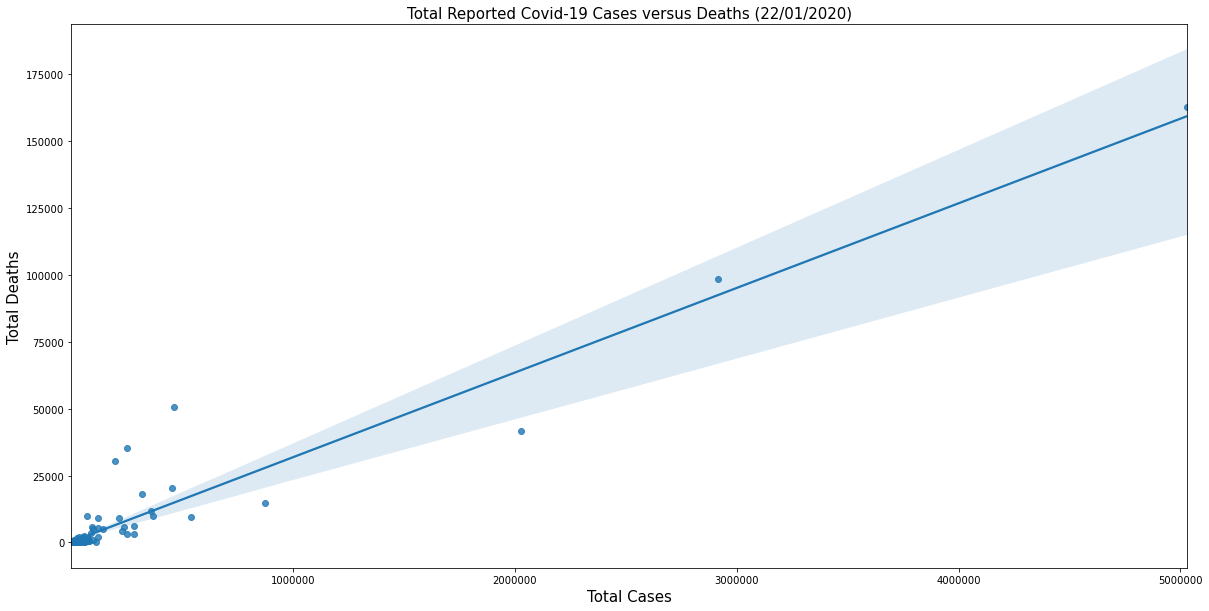

In [554]:
# Graph of relationship between the total reported Covid-19 cases and deaths on the 22/01/2020

plt.figure(figsize = (20,10))
plt.ticklabel_format(style='plain')
f = sns.regplot(data=df4, x="TotalCases", y="TotalDeaths")
f.set_xlabel("Total Cases", fontsize = 15)
f.set_ylabel("Total Deaths", fontsize = 15)
f.set_title("Total Reported Covid-19 Cases versus Deaths (22/01/2020)", fontsize = 15)
plt.show()
plt.close()

- A positive correlation is seen whereby as the number of cases increases, the total number of reported deaths increases which indicates a high level of severity of the Covid-19 virus on the mortality of infected people
- The positive correlation between the total Covid-19 cases and deaths is stronger than the relationship between the total reported Covid-19 tests and cases

In [555]:
# Calculation of the regression line between the variables of total reported Covid-19 cases and deaths on the 22/01/2020

x = df4['TotalCases']
y = df4['TotalDeaths']

def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 267.3809107578627 + 0.032β
Correlation Coef.:  0.9549609873430226
"Goodness of Fit":  0.9119504873471606


- The correlation coefficient of this regression line is positive (0.95) therefore you can say that there is a positive correlation between the total reported Covid-19 cases and deaths
- The goodness of fit (0.91) of this regression line is somewhat close to 1 which explains that the variable total cases is able to explain roughly 91% of the variance of the variable total deaths
- There is a stronger positive correlation between the total reported Covid-19 cases and deaths with a (0.91 Goodness of Fit) compared to the relationship between the total Covid-19 tests and cases with a (0.82 Goodness of Fit)

______________________________________________________________________________________________________________________

## Identifying Countries that have the Best and Worst Covid-19 Treatments
______________________________________________________________________________________________________________________


In [556]:
# Creating a new dataframe (df5) from countries, total cases and recovered data obtained from the (dfxx) dataframe

df5 = dfxx[["Country/Region", "TotalCases", "TotalRecovered"]]
df5.head()

,Country/Region,TotalCases,TotalRecovered
0,USA,5032179,2576668.0
1,Brazil,2917562,2047660.0
2,India,2025409,1377384.0
3,Russia,871894,676357.0
4,South Africa,538184,387316.0


In [557]:
# Creating new column (Healthy %) which shows the percentage of the patients that recovered from Covid-19

warnings.filterwarnings('ignore')
df5['Healthy%'] = df5['TotalRecovered']/df5['TotalCases'] * 100
df5.head()

,Country/Region,TotalCases,TotalRecovered,Healthy%
0,USA,5032179,2576668.0,51.203822
1,Brazil,2917562,2047660.0,70.183941
2,India,2025409,1377384.0,68.005228
3,Russia,871894,676357.0,77.573306
4,South Africa,538184,387316.0,71.967208


In [558]:
# Creating a dataframe (df5h) which has the percetage of reported recovered Covid-19 patients arranged in descending order

df5h = df5.sort_values(by="Healthy%", ascending=False)
df5h.head(10)

,Country/Region,TotalCases,TotalRecovered,Healthy%
176,Cayman Islands,203,202.0,99.507389
181,Brunei,141,138.0,97.872340
133,New Zealand,1569,1524.0,97.131931
166,Mauritius,344,334.0,97.093023
24,Qatar,112092,108831.0,97.090783
83,Malaysia,9038,8713.0,96.404072
188,Liechtenstein,89,85.0,95.505618
137,Jordan,1232,1171.0,95.048701
97,Djibouti,5330,5057.0,94.878049
129,Iceland,1930,1825.0,94.559585


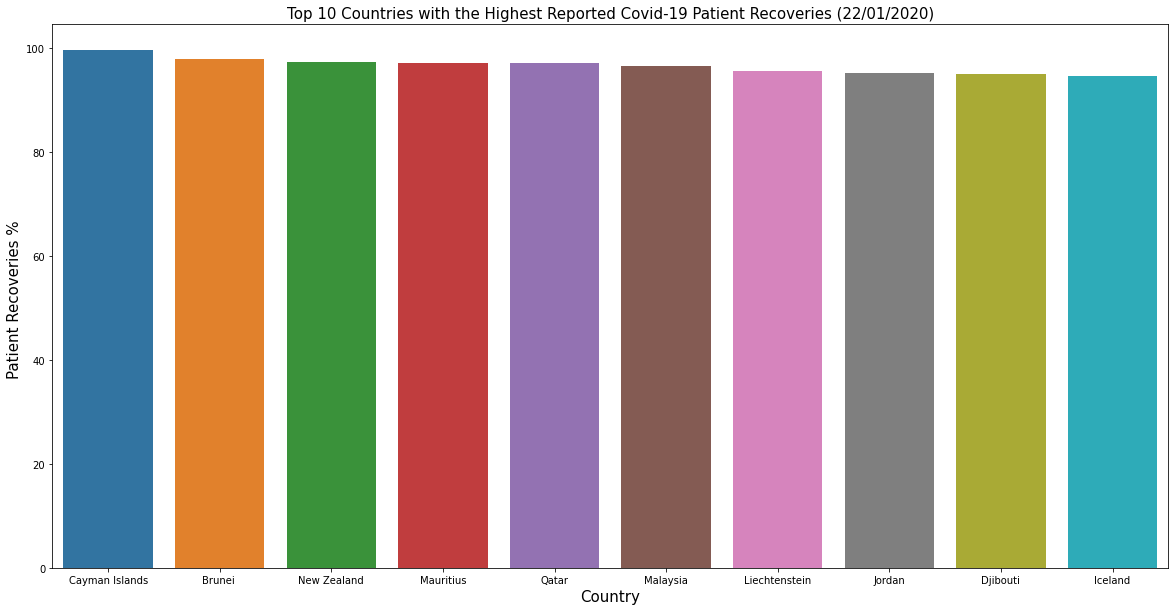

In [559]:
# Graph of top 10 countries with highest percentage of reported Covid-19 patient recoveries on the 22/01/2020

plt.figure(figsize = (20,10))
g = sns.barplot(x="Country/Region", y="Healthy%", data= df5h.iloc[0:10])
g.set_xlabel("Country", fontsize = 15)
g.set_ylabel("Patient Recoveries % ", fontsize = 15)
g.set_title("Top 10 Countries with the Highest Reported Covid-19 Patient Recoveries (22/01/2020)", fontsize = 15)
plt.show()
plt.close()

- Cayman Islands had the highest proportion (99.52%) of reported Covid-19 patient recoveries on the 22/01/2020
- This does not indicate that Cayman Islands has the best medical treatments as we do not have sufficient data to draw an accurate conclusion, and this can be due to a variety of factors such as its low reported number of overall Covid-19 cases

In [560]:
# Creating a dataframe (df5l) which has the percentage of reported recovered Covid-19 patients arranged in descending order

df5l = df5.sort_values(by="Healthy%", ascending=True)
df5l.head(10)

,Country/Region,TotalCases,TotalRecovered,Healthy%
152,Botswana,804,63.0,7.835821
153,Bahamas,761,91.0,11.957950
99,Libya,4879,652.0,13.363394
46,Honduras,45098,6116.0,13.561577
150,Gambia,935,136.0,14.545455
117,Namibia,2652,563.0,21.229261
155,Lesotho,742,175.0,23.584906
35,Belgium,71158,17661.0,24.819416
98,Greece,5123,1374.0,26.820223
105,Zimbabwe,4339,1264.0,29.131136


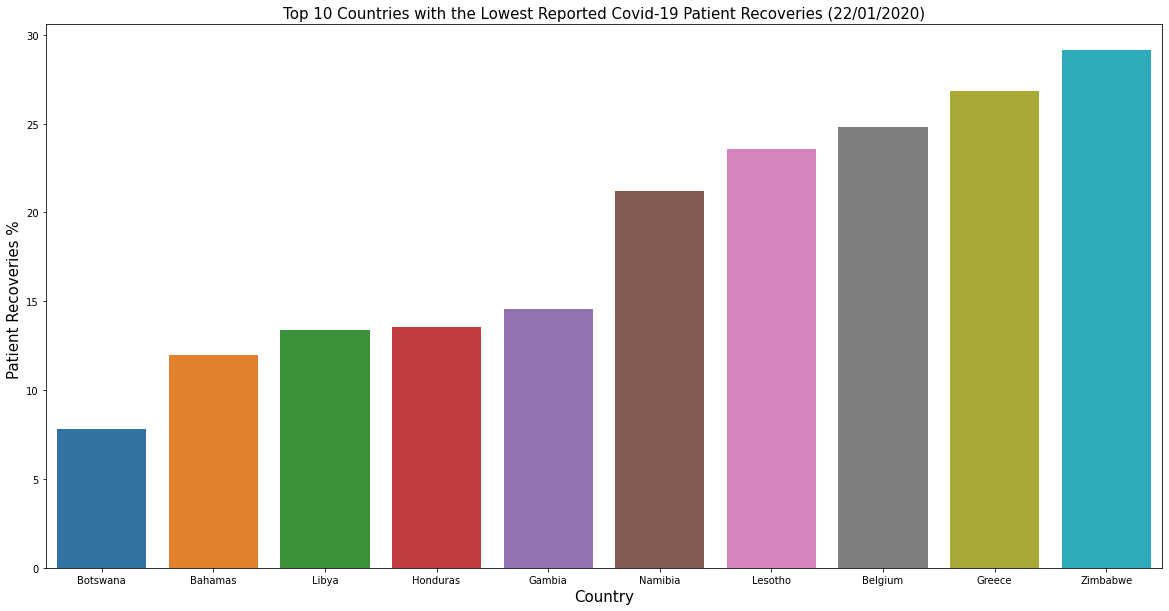

In [561]:
# Graph of top 10 countries with lowest percentage of reported Covid-19 patient recoveries on the 22/01/2020

plt.figure(figsize = (20,10))
h = sns.barplot(x="Country/Region", y="Healthy%", data= df5l.iloc[0:10])
h.set_xlabel("Country", fontsize = 15)
h.set_ylabel("Patient Recoveries % ", fontsize = 15)
h.set_title("Top 10 Countries with the Lowest Reported Covid-19 Patient Recoveries (22/01/2020)", fontsize = 15)
plt.show()
plt.close()

- Botswana had the lowest proportion (7.84%) of reported Covid-19 patient recoveries on the 22/01/2020
- This statement is only valid based on the data we analyzed and we need more data to confirm this hypothesis, and the low patient recoveries can be attributed to poor medical facilities and treatments offered in Botswana


______________________________________________________________________________________________________________________

## Conclusion
______________________________________________________________________________________________________________________
1. Based on the data, USA is seen to have the highest number of reported Covid-19 cases (5032179). On the other hand, Montserrat has the lowest number of reported Covid-19 cases (13). This is a huge difference with the USA which can be attributed to several reasons. This could be due to the USA having better Covid-19 testing kits or more test centers which would increase the number of cases. Also, maybe USA might be closer to the epicenter of the Covid-19 pandemic thus there might be a stronger route of viral transmission. There is possibility that people from the countries with lower reported cases could have a genetic makeup that makes them more resistant to the virus, hence the lower reported case numbers. All this reasonings are just speculation and our data is not enough to confirm these ideas.

2. From our analysis, it seems that North America has the highest reported Covid-19 cases and in contrast, Australia/Oceania has the lowest. This could be due to their geographical location to the epicenter of the Covid-19 pandemic. Also, maybe North America is a more popular tourist destination which could explain how more of the virus has entered and affected its population. Both ideas cannot be confirmed from this data analysis alone and requires further studies.

3. We have shown that the more reported Covid-19 test done, the higher the cases are. This makes sense because the tests are one of the main ways the Covid-19 cases are reported, besides patients getting directly diagnosed in the hospital when the symptoms are severe enough. Furthermore, we show that USA has the highest reported Covid-19 tests done which could explain why it was previously identified to have the highest Covid-19 cases.

4. We identified that the Covid-19 virus severely impacts patients by showing a strong positive correlation between the number of reported Covid-19 cases and deaths. This correlation is even stronger than the relationship between the number of reported Covid-19 tests and cases. This could be because the virus has not been identified before, therefore existing treatments were lacking which attributed to the high number of deaths. This idea cannot be supported by our data and requires further studies for confirmation

5. Cayman Islands had the highest proportion of Covid-19 patient recoveries (99.52%) and Botswana had the lowest (7.84%). This number could be because Cayman Islands had a relatively low number of cases to begin with. Also, Botswana could have a poor healthcare system to combat Covid-19 which would explain the low patient recovery rate. Both ideas cannot be supported through our analysis, and we cannot conclude which countries have better healthcare facilities and treatments based on this study. 

______________________________________________________________________________________________________________________

## Future Work
______________________________________________________________________________________________________________________
This study has highlighted some interesting findings based on the available dataset. However, a lot of future work is needed to confirm some of the hypothesis brought up during this analysis. There are a number of ways in which the study can be improved on:

1. Increasing the number of reported countries
2. Identifying what criteria each country uses to classify a Covid-19 case
3. Obtaining the data on each country’s healthcare rating 